<a href="https://colab.research.google.com/github/npaps112/320-final-project/blob/main/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import bs4, requests, pandas, numpy
import seaborn
import matplotlib.pyplot as plt
import time
import csv



In [57]:
# Data collection/curation

team = "oti"

year = 2002 # should be 1966 # the season for the 1977 superbowl (superbowl #1)


team_index = 0
conference = "AFC"

my_df = pandas.DataFrame(columns = ["ID", "PF", "PF rank", "PA", "PA rank", "RY (off)", "RY (off) rank", "RY (def)", "RY (def) rank", "RY/A (off)", "RY/A (off) rank", "RY/A (def)", "RY/A (def) rank",
                 "PY (off)", "PY (off) rank", "PY (def)", "PY (def) rank", "TO (off)", "TO (off) rank", "PY/A (off)", "PY/A (off) rank", "PY/A (def)", "PY/A (def) rank",
                 "TO (def)", "TO (def) rank", "Conference", "Playoffs?", "Champion?", "Champ runner up?", "Year", 'color'])


while team != "done":
  # if team == "rav": # The ravens were added in 1996
  #  year = 1996
  #if team == "car" or team == "jax": # The panthers and jags in '95
  #  year = 1995
  #if team == "cin": # the bengals were added in 1968
  #  year = 1968
  #if team == "htx": # The texans are the newest team to the league
  #  year = 2002
  #if team == "nor": # The earliest edition since the advent of the superbowl
  #  year = 1967
  #if team == "sea" or team == "tam": # The final two teams who are newer than the superbowl
  #  year = 1976 
  
  while year < 2022: # The 2022 season is incomplete so that is when our data stops being useful

    url = "https://www.pro-football-reference.com/teams/" + team + "/" + str(year) + ".htm"
    response = requests.get(url)


    time.sleep(3)
    print(str(year) + " " + team)

    table_list = pandas.read_html(response.text)
    season = pandas.DataFrame(table_list[0])
    schedule = pandas.DataFrame(table_list[1])

    playoffs = False
    runner_up = False
    champ = False
    color = "Blue"

    
    
    i = 0
    while i < len(schedule):
      if runner_up == True and schedule.iloc[i][:, 'Week'][0] == "SuperBowl":
        champ = True
        runner_up = False
        color = "Red"
      if playoffs == True and schedule.iloc[i][:, 'Week'][0] == "Conf. Champ.":
        runner_up = True
        color = "Black"
      if schedule.iloc[i][:, "Date"][0] == "Playoffs":
        playoffs = True
        color = "Yellow"
      i += 1
    print(color)
    row = [team + " " + str(year), season.iloc[0][:, "PF"][0], season.iloc[2][:, "PF"][0], season.iloc[1][:, "PF"][0], season.iloc[3][:, "PF"][0], 
                  season.iloc[0]['Rushing', "Yds"], season.iloc[2]['Rushing', "Yds"], season.iloc[1]['Rushing', "Yds"], season.iloc[3]['Rushing', "Yds"], 
                  season.iloc[0]['Rushing', "Y/A"], season.iloc[2]['Rushing', "Y/A"], season.iloc[1]['Rushing', "Y/A"], season.iloc[3]['Rushing', "Y/A"],
                  season.iloc[0]['Passing', "Yds"], season.iloc[2]['Passing', "Yds"], season.iloc[1]['Passing', "Yds"], season.iloc[3]['Passing', "Yds"], 
                  season.iloc[0]['Passing', "NY/A"], season.iloc[2]['Passing', "NY/A"], season.iloc[1]['Passing', "NY/A"], season.iloc[3]['Passing', "NY/A"],
                  season.iloc[0][:, "TO"], season.iloc[2][:, "TO"], season.iloc[1][:, "TO"], season.iloc[3][:, "TO"],
                  conference, playoffs, champ, runner_up, year, color]
    
    
    my_df.loc[len(my_df.index)] = row
    year += 1

  # below are teams from the AFC

  if team_index == 0: # titans
    team = "jax"
    team_index = 1
  elif team_index == 1: # jaguars
    team = "clt"
    team_index = 2
  elif team_index == 2: # colts
    team = "htx"
    team_index = 3
  elif team_index == 3: # texans
    team = "rav"
    team_index = 4
  elif team_index == 4: # ravens
    team = "cin"
    team_index = 5
  elif team_index == 5: # bengals
    team = "cle"
    team_index = 6
  elif team_index == 6: # browns
    team = "pit"
    team_index = 7
  elif team_index == 7: # steelers
    team = "nyj"
    team_index = 8
  elif team_index == 8: # jets
    team = "nwe"
    team_index = 9
  elif team_index == 9: # patriots
    team = "buf"
    team_index = 10
  elif team_index == 10: # bills
    team = "mia"
    team_index = 11
  elif team_index == 11: # dolphins
    team = "den"
    team_index = 12
  elif team_index == 12: # broncos
    team = "kan"
    team_index = 13
  elif team_index == 13: # chiefs
    team = "sdg"
    team_index = 14
  elif team_index == 14: # chargers
    team = "rai"
    team_index = 15
    conference = "NFC"
  elif team_index == 15: # raiders 
    
    # Below are teams from the NFC 
    team = "phi"
    team_index = 16

  elif team_index == 16: # eagles
    team = "dal"
    team_index = 17
  elif team_index == 17: # cowboys 
    team = "nyg"
    team_index = 18
  elif team_index == 18: # giants
    team = "was"
    team_index = 19
  elif team_index == 19: # commanders
    team = "nor"
    team_index = 20
  elif team_index == 20: # saints
    team = "tam"
    team_index = 21
  elif team_index == 21: # buccanneers
    team = "atl" 
    team_index = 22
  elif team_index == 22: # falcons
    team = "car"
    team_index = 23
  elif team_index == 23: # panthers
    team = "gnb"
    team_index = 24
  elif team_index == 24: # packers
    team = "det"
    team_index = 25
  elif team_index == 25: # lions
    team = "min"
    team_index = 26
  elif team_index == 26: # vikings
    team = "chi"
    team_index = 27
  elif team_index == 27: # bears
    team = "ram"
    team_index = 28
  elif team_index == 28: # rams
    team = "sea"
    team_index = 29
  elif team_index == 29: # seahawks
    team = "sfo"
    team_index = 30
  elif team_index == 30: # 49ers
    team = "crd" 
    team_index = 31
  elif team_index == 31: # cardinals
    team = "done"
  year = 2002 # 1966



2002 oti
Black
2003 oti
Yellow
2004 oti
Blue
2005 oti
Blue
2006 oti
Blue
2007 oti
Yellow
2008 oti
Yellow
2009 oti
Blue
2010 oti
Blue
2011 oti
Blue
2012 oti
Blue
2013 oti
Blue
2014 oti
Blue
2015 oti
Blue
2016 oti
Blue
2017 oti
Yellow
2018 oti
Blue
2019 oti
Black
2020 oti
Yellow
2021 oti
Yellow
2002 jax
Blue
2003 jax
Blue
2004 jax
Blue
2005 jax
Yellow
2006 jax
Blue
2007 jax
Yellow
2008 jax
Blue
2009 jax
Blue
2010 jax
Blue
2011 jax
Blue
2012 jax
Blue
2013 jax
Blue
2014 jax
Blue
2015 jax
Blue
2016 jax
Blue
2017 jax
Black
2018 jax
Blue
2019 jax
Blue
2020 jax
Blue
2021 jax
Blue
2002 clt
Yellow
2003 clt
Black
2004 clt
Yellow
2005 clt
Yellow
2006 clt
Red
2007 clt
Yellow
2008 clt
Yellow
2009 clt
Red
2010 clt
Yellow
2011 clt
Blue
2012 clt
Yellow
2013 clt
Yellow
2014 clt
Black
2015 clt
Blue
2016 clt
Blue
2017 clt
Blue
2018 clt
Yellow
2019 clt
Blue
2020 clt
Yellow
2021 clt
Blue
2002 htx
Blue
2003 htx
Blue
2004 htx
Blue
2005 htx
Blue
2006 htx
Blue
2007 htx
Blue
2008 htx
Blue
2009 htx
Blue
2010 htx


In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

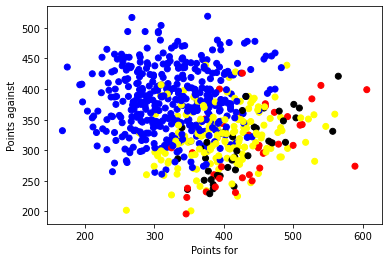

In [68]:
fig, ax = plt.subplots()
colors = {'Red':'red', 'Yellow':'yellow', 'Blue':'blue', "Black": 'black'} # Red corresponds to conference winner. Black to conference runner up. Yellow to playoff team. Blue to teams that missed the playoffs

ax.scatter(my_df['PF'], my_df['PA'], c=my_df['color'].map(colors))

plt.xlabel("Points for")
plt.ylabel("Points against")
plt.show() 


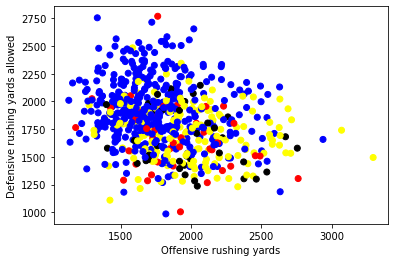

In [67]:
fig, ax = plt.subplots()

ax.scatter(my_df['RY (off)'], my_df['RY (def)'], c=my_df['color'].map(colors))

plt.xlabel("Offensive rushing yards")
plt.ylabel("Defensive rushing yards allowed")
plt.show()



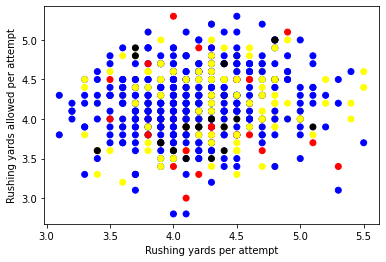

In [66]:

fig, ax = plt.subplots()

ax.scatter(my_df['RY/A (off)'], my_df['RY/A (def)'], c=my_df['color'].map(colors))

plt.xlabel("Rushing yards per attempt")
plt.ylabel("Rushing yards allowed per attempt")

plt.show()


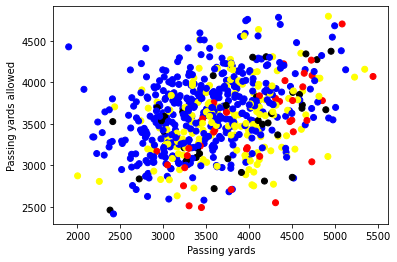

In [69]:
fig, ax = plt.subplots()

ax.scatter(my_df['PY (off)'], my_df['PY (def)'], c=my_df['color'].map(colors))

plt.xlabel("Passing yards")
plt.ylabel("Passing yards allowed")

plt.show()

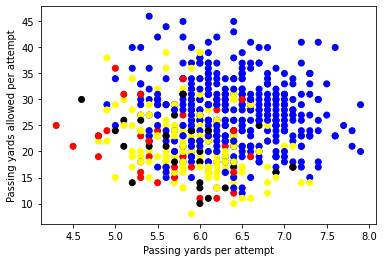

In [70]:
fig, ax = plt.subplots()

ax.scatter(my_df['PY/A (off)'], my_df['PY/A (def)'], c=my_df['color'].map(colors))

plt.xlabel("Passing yards per attempt")
plt.ylabel("Passing yards allowed per attempt")

plt.show()

In [88]:
# Let's remove all the data of team's that do not make the playoffs

playoff_df = my_df[my_df['color'] != "Blue"]

playoff_df["Champion winner?"] = playoff_df.apply(lambda y: 1 if y["color"] == "Yellow" else 0, axis=1)

PA_x = playoff_df[["PF", "PA"]]
y =  playoff_df["Champion winner?"]

clf = AdaBoostClassifier(n_estimators=100)
PA_scores = cross_val_score(clf, PA_x, y, cv=10)

print(PA_scores)
print(PA_scores.mean())

<ipython-input-88-157e5e1e7e77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playoff_df["Champion winner?"] = playoff_df.apply(lambda y: 1 if y["color"] == "Yellow" else 0, axis=1)


[0.52       0.76       0.68       0.64       0.66666667 0.70833333
 0.625      0.66666667 0.83333333 0.58333333]
0.6683333333333332


In [87]:
RY_x = playoff_df[["RY/A (off)", "RY/A (def)"]]
y =  playoff_df["Champion winner?"]

clf = AdaBoostClassifier(n_estimators=100)
RY_scores = cross_val_score(clf, RY_x, y, cv=10)

print(RY_scores)
print(RY_scores.mean())

[0.6        0.56       0.64       0.6        0.66666667 0.54166667
 0.58333333 0.58333333 0.54166667 0.54166667]
0.5858333333333334


In [86]:
from scipy.stats import ttest_ind

print(ttest_ind(PA_scores, RY_scores, alternative="less"))

print(ttest_ind(PA_scores, RY_scores, alternative="greater"))

Ttest_indResult(statistic=2.67385336278382, pvalue=0.0077435892636865435)

In [89]:
combined_x = playoff_df[["PF", "PA", "RY/A (off)", "RY/A (def)"]]
y =  playoff_df["Champion winner?"]

clf = AdaBoostClassifier(n_estimators=100)
combined_scores = cross_val_score(clf, combined_x, y, cv=10)

print(combined_scores)
print(combined_scores.mean())

[0.56       0.72       0.56       0.72       0.66666667 0.75
 0.66666667 0.625      0.66666667 0.66666667]
0.6601666666666667
